# Discuss problems with the code below, improve it, and add another method of your choice.

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier


In [2]:
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

def rmse(y_true, y_pred):
  return sqrt(mse(y_true, y_pred))

# Reading the data from the file

In [3]:
url = 'https://raw.githubusercontent.com/BoBernhardsson/SomeData/main/CrabAgePrediction.csv'
crab = pd.read_csv(url, delimiter= ",");

In [4]:
crab

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
...,...,...,...,...,...,...,...,...,...
3888,F,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8
3889,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10
3890,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5
3891,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6


# Data Inspection

In [5]:
#getting a general information about the dataset
crab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [87]:
crab.describe(include='all')

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893,3.893000e+03,3.893000e+03,3.893000e+03,3.893000e+03,3.893000e+03,3.893000e+03,3.893000e+03,3893.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,-5.302149e-16,1.743047e-16,1.095108e-17,-2.436616e-16,2.007698e-17,-5.019246e-17,9.764715e-17,9.954791
std,NaN,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,3.220967
min,NaN,-3.741130e+00,-3.560232e+00,-3.328551e+00,-1.692697e+00,-1.622288e+00,-1.650390e+00,-1.712786e+00,1.000000
25%,NaN,-6.202080e-01,-5.884186e-01,-5.894841e-01,-7.844137e-01,-7.751192e-01,-7.963611e-01,-7.816762e-01,8.000000
50%,NaN,1.704255e-01,1.671270e-01,1.250551e-01,-5.574583e-02,-1.064210e-01,-8.847636e-02,-3.391213e-02,10.000000
75%,NaN,7.529975e-01,7.211939e-01,6.014145e-01,6.637371e-01,6.481236e-01,6.650784e-01,6.491416e-01,11.000000


In [ ]:
# There are 28 different Age values
np.sort(crab.Age.unique())

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
# scaler = MinMaxScaler()
columns_to_scale = crab.columns[1:7]
crab[columns_to_scale] = scaler.fit_transform(crab[columns_to_scale])

# Data Analysis

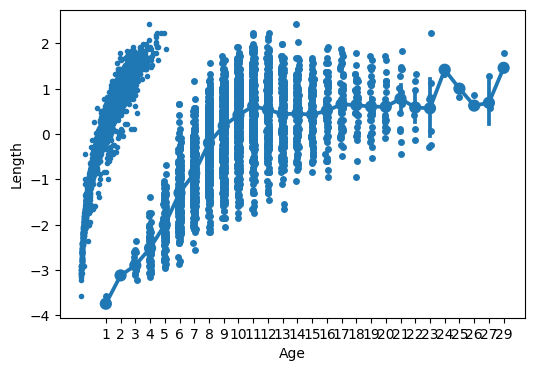

In [91]:
# Some useful plotting syntax, uncomment to run

plt.figure(figsize=(6,4))
sns.pointplot(y=crab.Length,x=crab.Age,data=crab)
sns.stripplot(x=crab.Age,y=crab.Diameter,data=crab)
plt.plot(crab.Weight, crab.Diameter,'.')
plt.show()

<ipython-input-92-110de25f84ac>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = crab.corr()


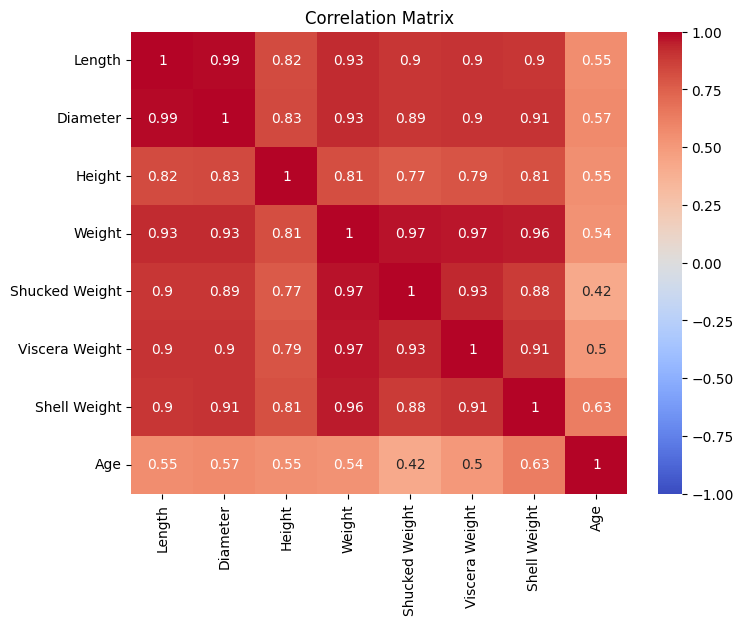

In [92]:
plt.figure(figsize=(8, 6))
correlation_matrix = crab.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

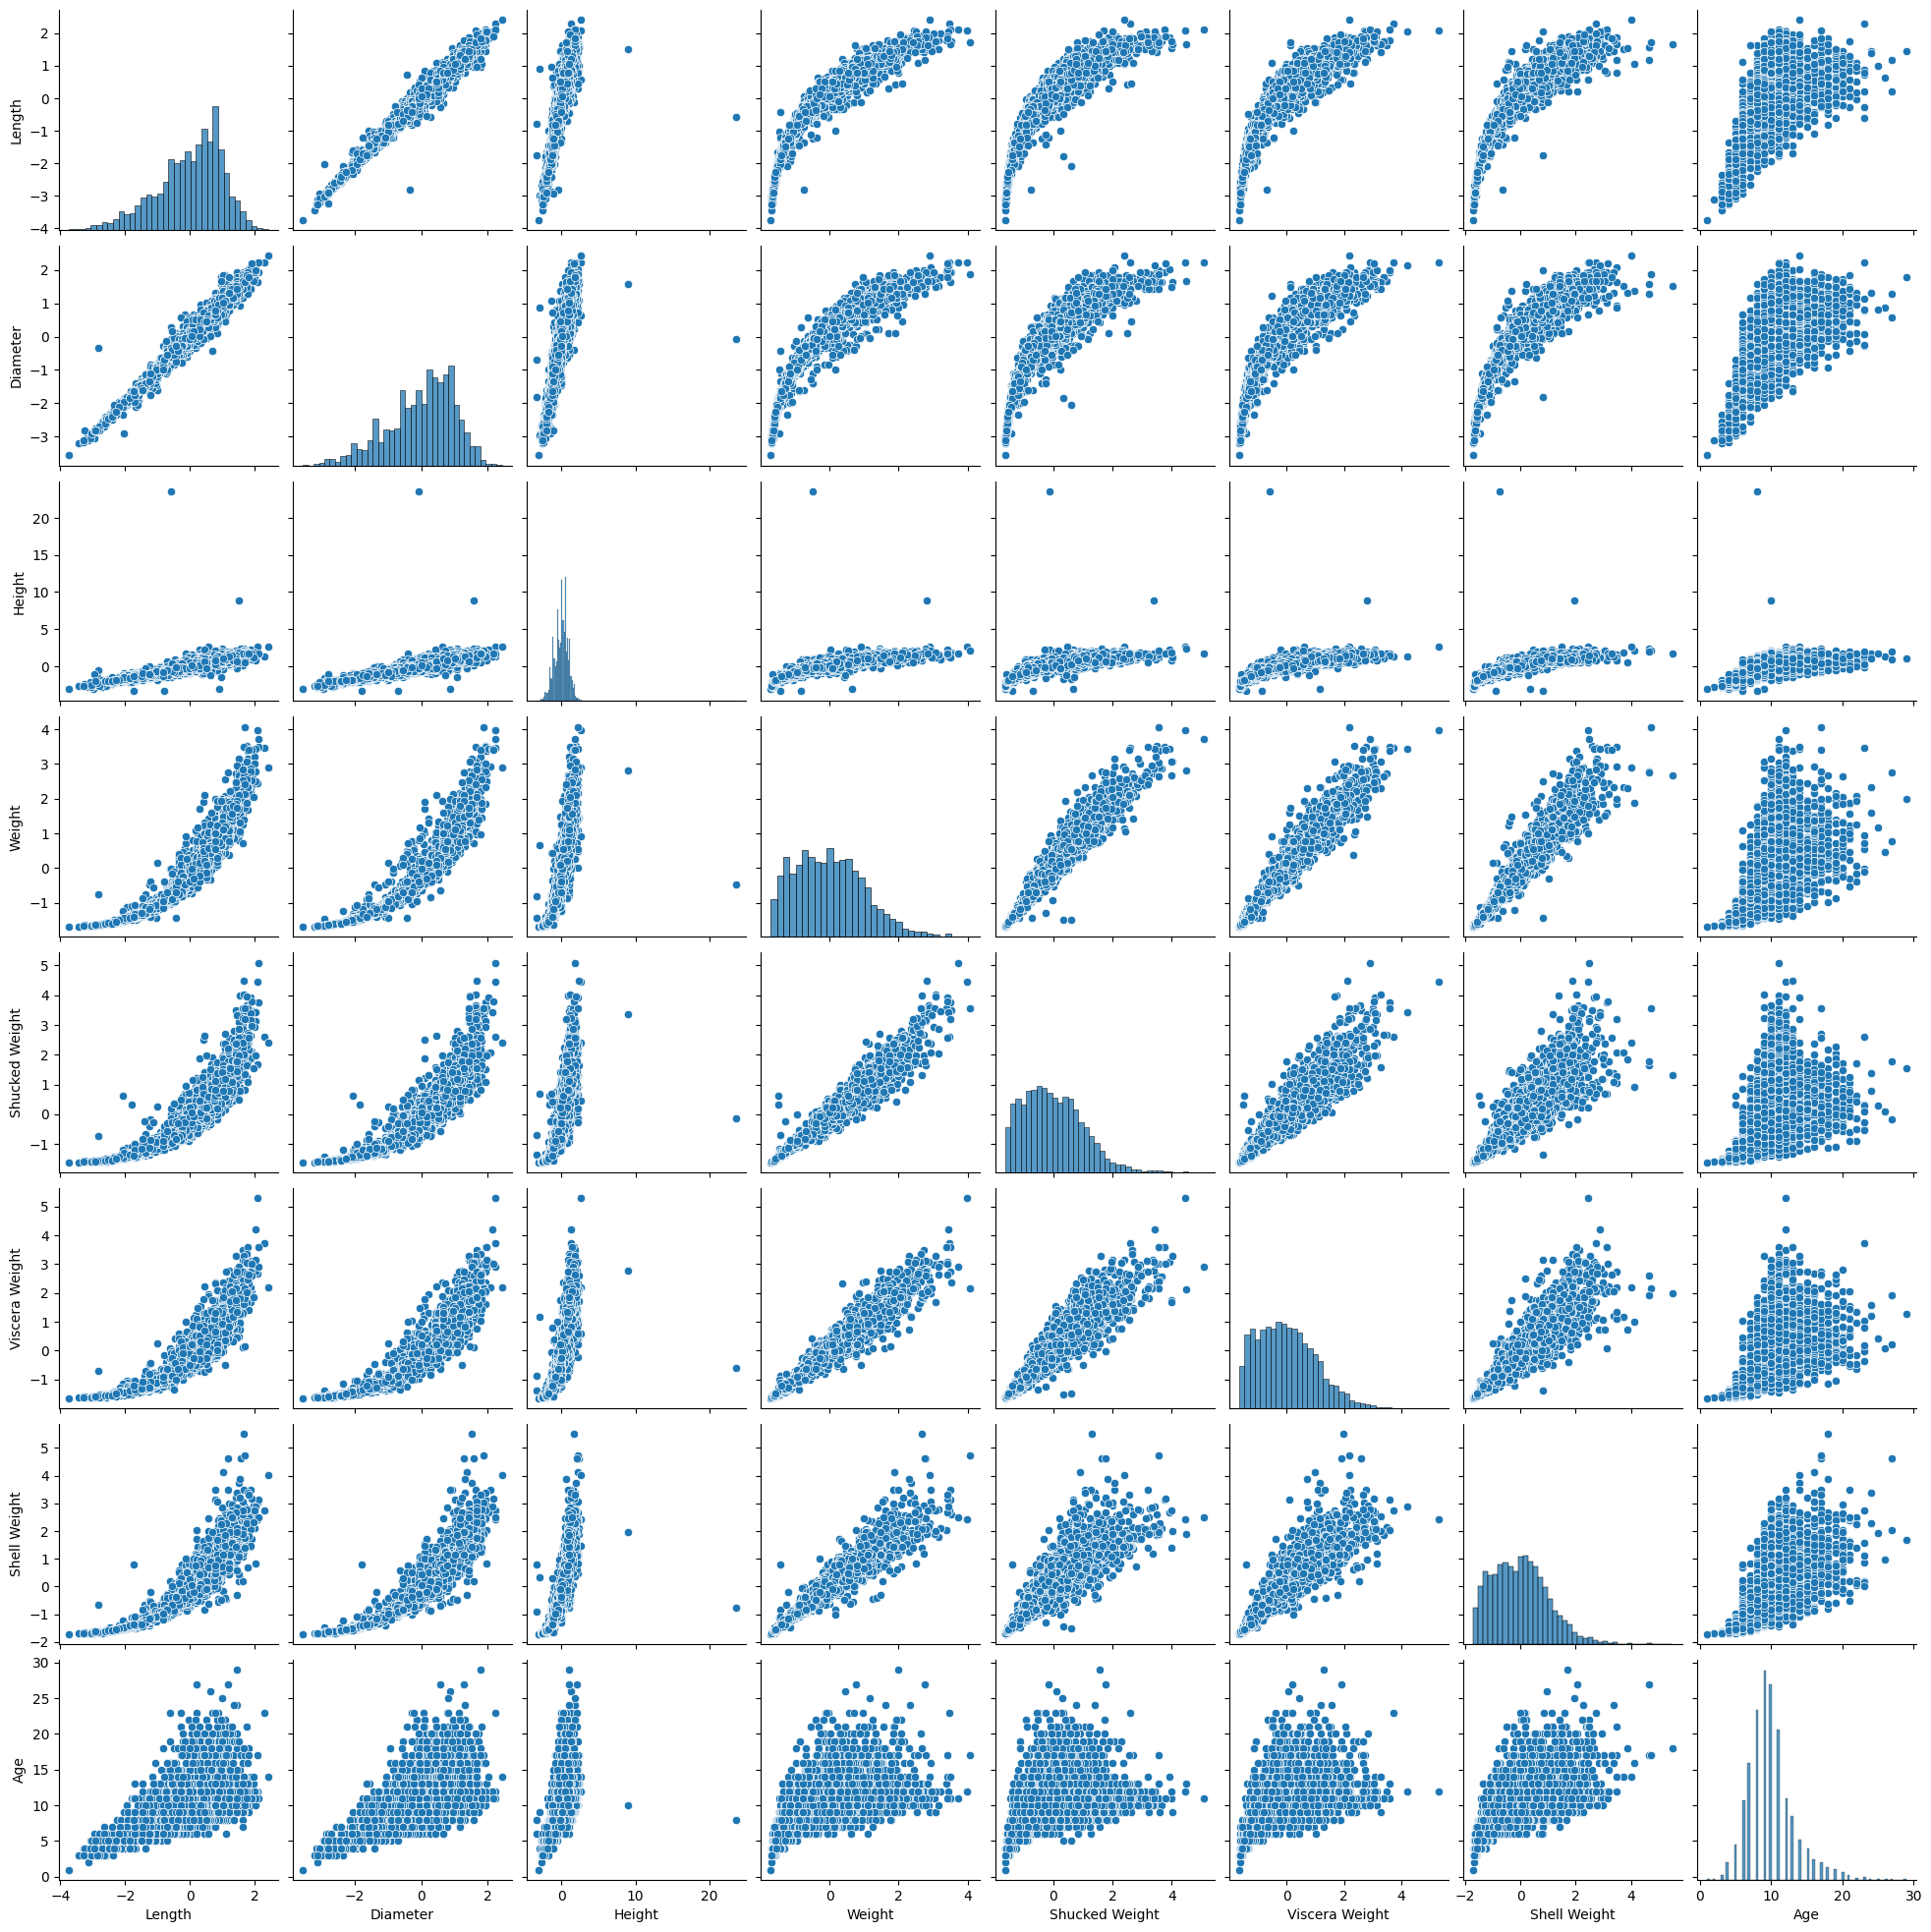

In [104]:
sns.pairplot(crab)
plt.show()

In [56]:
# Some more useful syntax for data manipulation

mask = (crab['Height'] > 0.1) & (16.8 < crab['Weight']) & (crab['Weight'] < 16.9)
indices = crab.index[mask]
print(crab.loc[indices])
mean_SW = crab['Shucked Weight'].mean()
crab.loc[indices,'Diameter'] = 1


Empty DataFrame
Columns: [Sex, Length, Diameter, Height, Weight, Shucked Weight, Viscera Weight, Shell Weight, Age]
Index: []


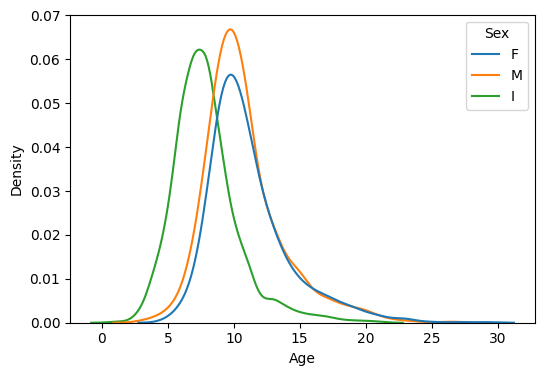

In [93]:
plt.figure(figsize=(6,4))
sns.kdeplot(x=crab.Age,hue=crab.Sex,data=crab)
plt.show()

# Label Encoding

In [94]:
#'Sex' column is categorical in nature and has 3 types of entries
crab.Sex.unique()

array(['F', 'M', 'I'], dtype=object)

In [139]:
# Encodes categorical variable into numbers using a label encoder, store new data in crab_le
crab_le = crab.copy(deep=True)
le = preprocessing.LabelEncoder()
crab_le['Sex'] = le.fit_transform(crab['Sex'])                 # transform column to numerics using label encoder

for cls, val in zip(le.classes_, le.transform(le.classes_)):   # checking data after encoding
 print(f"{cls} is encoded as {val}")

crab_le

F is encoded as 0
I is encoded as 1
M is encoded as 2


,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,0.420099,0.620454,0.601415,0.076925,0.338625,0.144441,-0.012342,9
1,2,-1.410841,-1.495073,-1.304023,-1.307952,-1.260829,-1.211958,-1.328119,6
2,1,-0.911494,-0.991376,-0.946754,-1.124255,-1.111727,-1.138886,-1.022543,6
3,0,-0.453759,-0.538049,-0.946754,-0.726243,-0.870002,-0.919670,-0.393414,10
4,1,-1.410841,-1.444704,-1.304023,-1.199775,-1.075582,-1.175422,-1.292169,6
...,...,...,...,...,...,...,...,...,...
3888,0,0.503324,0.469345,-0.232215,0.090192,0.230187,0.231214,-0.105813,8
3889,0,0.794610,0.771564,0.839594,0.784161,0.835630,0.655944,0.756992,10
3890,1,-2.284700,-2.250619,-1.780383,-1.551862,-1.504814,-1.485978,-1.561796,5
3891,1,-0.828269,-0.991376,-0.827664,-0.951783,-0.908407,-0.901402,-0.968617,6


In [95]:
# If wanted, one could instead use a onehot encoder
crab_onehot = crab.copy(deep = True)
crab_onehot = pd.get_dummies(crab_onehot, columns=['Sex'])
crab_onehot

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,0.420099,0.620454,0.601415,0.076925,0.338625,0.144441,-0.012342,9,1,0,0
1,-1.410841,-1.495073,-1.304023,-1.307952,-1.260829,-1.211958,-1.328119,6,0,0,1
2,-0.911494,-0.991376,-0.946754,-1.124255,-1.111727,-1.138886,-1.022543,6,0,1,0
3,-0.453759,-0.538049,-0.946754,-0.726243,-0.870002,-0.919670,-0.393414,10,1,0,0
4,-1.410841,-1.444704,-1.304023,-1.199775,-1.075582,-1.175422,-1.292169,6,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
3888,0.503324,0.469345,-0.232215,0.090192,0.230187,0.231214,-0.105813,8,1,0,0
3889,0.794610,0.771564,0.839594,0.784161,0.835630,0.655944,0.756992,10,1,0,0
3890,-2.284700,-2.250619,-1.780383,-1.551862,-1.504814,-1.485978,-1.561796,5,0,1,0
3891,-0.828269,-0.991376,-0.827664,-0.951783,-0.908407,-0.901402,-0.968617,6,0,1,0


# Choosing inputs and outputs


In [148]:
#ip=crab.drop(['Sex','Age'],axis=1).         # drops column 'Sex' that is categorical and output 'Age'
op = crab.Age
# ip = crab.drop(['Age', 'Sex','Height'],axis=1)
# ip2 = crab_le.drop(['Age'],axis=1)
ip2 = crab_onehot.drop(['Age','Length','Viscera Weight','Sex_I'],axis=1)
ip3 = crab_onehot.drop(['Age','Length','Viscera Weight','Sex_I'],axis=1)
# ip3 = crab_onehot.drop(['Age'],axis=1)
ip = ip3

# Applying K-Nearest Neighbors

In [151]:
#Initial solution
rmsbest = 10000;
accbest=0;
for i in range(0,10):                                   # Try many times to improve performance
  x_train,x_test,y_train,y_test = train_test_split(ip,op,test_size=0.35,random_state=i)
  for k in range(10,20):
      alg = KNeighborsClassifier(n_neighbors=k)
      alg.fit(x_train,y_train)
      yp = alg.predict(x_test)                          # predict the data
      acc = metrics.accuracy_score(y_test,yp)           # classifier accuracy
      rmserr = rmse(yp,y_test.values)  # rms error
      print(f"i: {i},  k: {k}, RMSerror: {rmserr:.3f}")
      if rmserr < rmsbest:
        rmsbest = rmserr
        accbest = acc;
        ibest = i


i: 0,  k: 10, RMSerror: 2.766
i: 0,  k: 11, RMSerror: 2.766
i: 0,  k: 12, RMSerror: 2.737
i: 0,  k: 13, RMSerror: 2.721
i: 0,  k: 14, RMSerror: 2.686
i: 0,  k: 15, RMSerror: 2.681
i: 0,  k: 16, RMSerror: 2.676
i: 0,  k: 17, RMSerror: 2.658
i: 0,  k: 18, RMSerror: 2.674
i: 0,  k: 19, RMSerror: 2.698
i: 1,  k: 10, RMSerror: 2.703
i: 1,  k: 11, RMSerror: 2.694
i: 1,  k: 12, RMSerror: 2.728
i: 1,  k: 13, RMSerror: 2.699
i: 1,  k: 14, RMSerror: 2.705
i: 1,  k: 15, RMSerror: 2.676
i: 1,  k: 16, RMSerror: 2.678
i: 1,  k: 17, RMSerror: 2.648
i: 1,  k: 18, RMSerror: 2.671
i: 1,  k: 19, RMSerror: 2.699
i: 2,  k: 10, RMSerror: 2.666
i: 2,  k: 11, RMSerror: 2.660
i: 2,  k: 12, RMSerror: 2.659
i: 2,  k: 13, RMSerror: 2.668
i: 2,  k: 14, RMSerror: 2.645
i: 2,  k: 15, RMSerror: 2.663
i: 2,  k: 16, RMSerror: 2.661
i: 2,  k: 17, RMSerror: 2.688
i: 2,  k: 18, RMSerror: 2.669
i: 2,  k: 19, RMSerror: 2.670
i: 3,  k: 10, RMSerror: 2.624
i: 3,  k: 11, RMSerror: 2.607
i: 3,  k: 12, RMSerror: 2.629
i: 3,  k: 

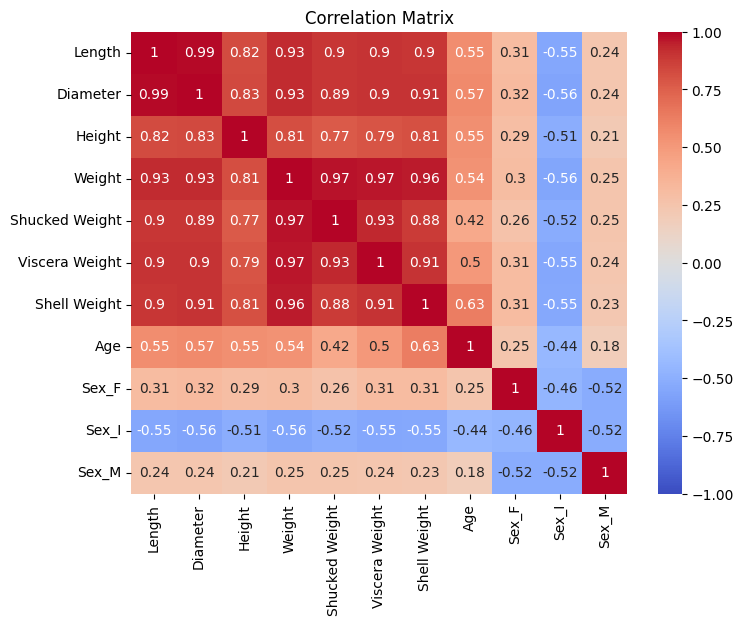

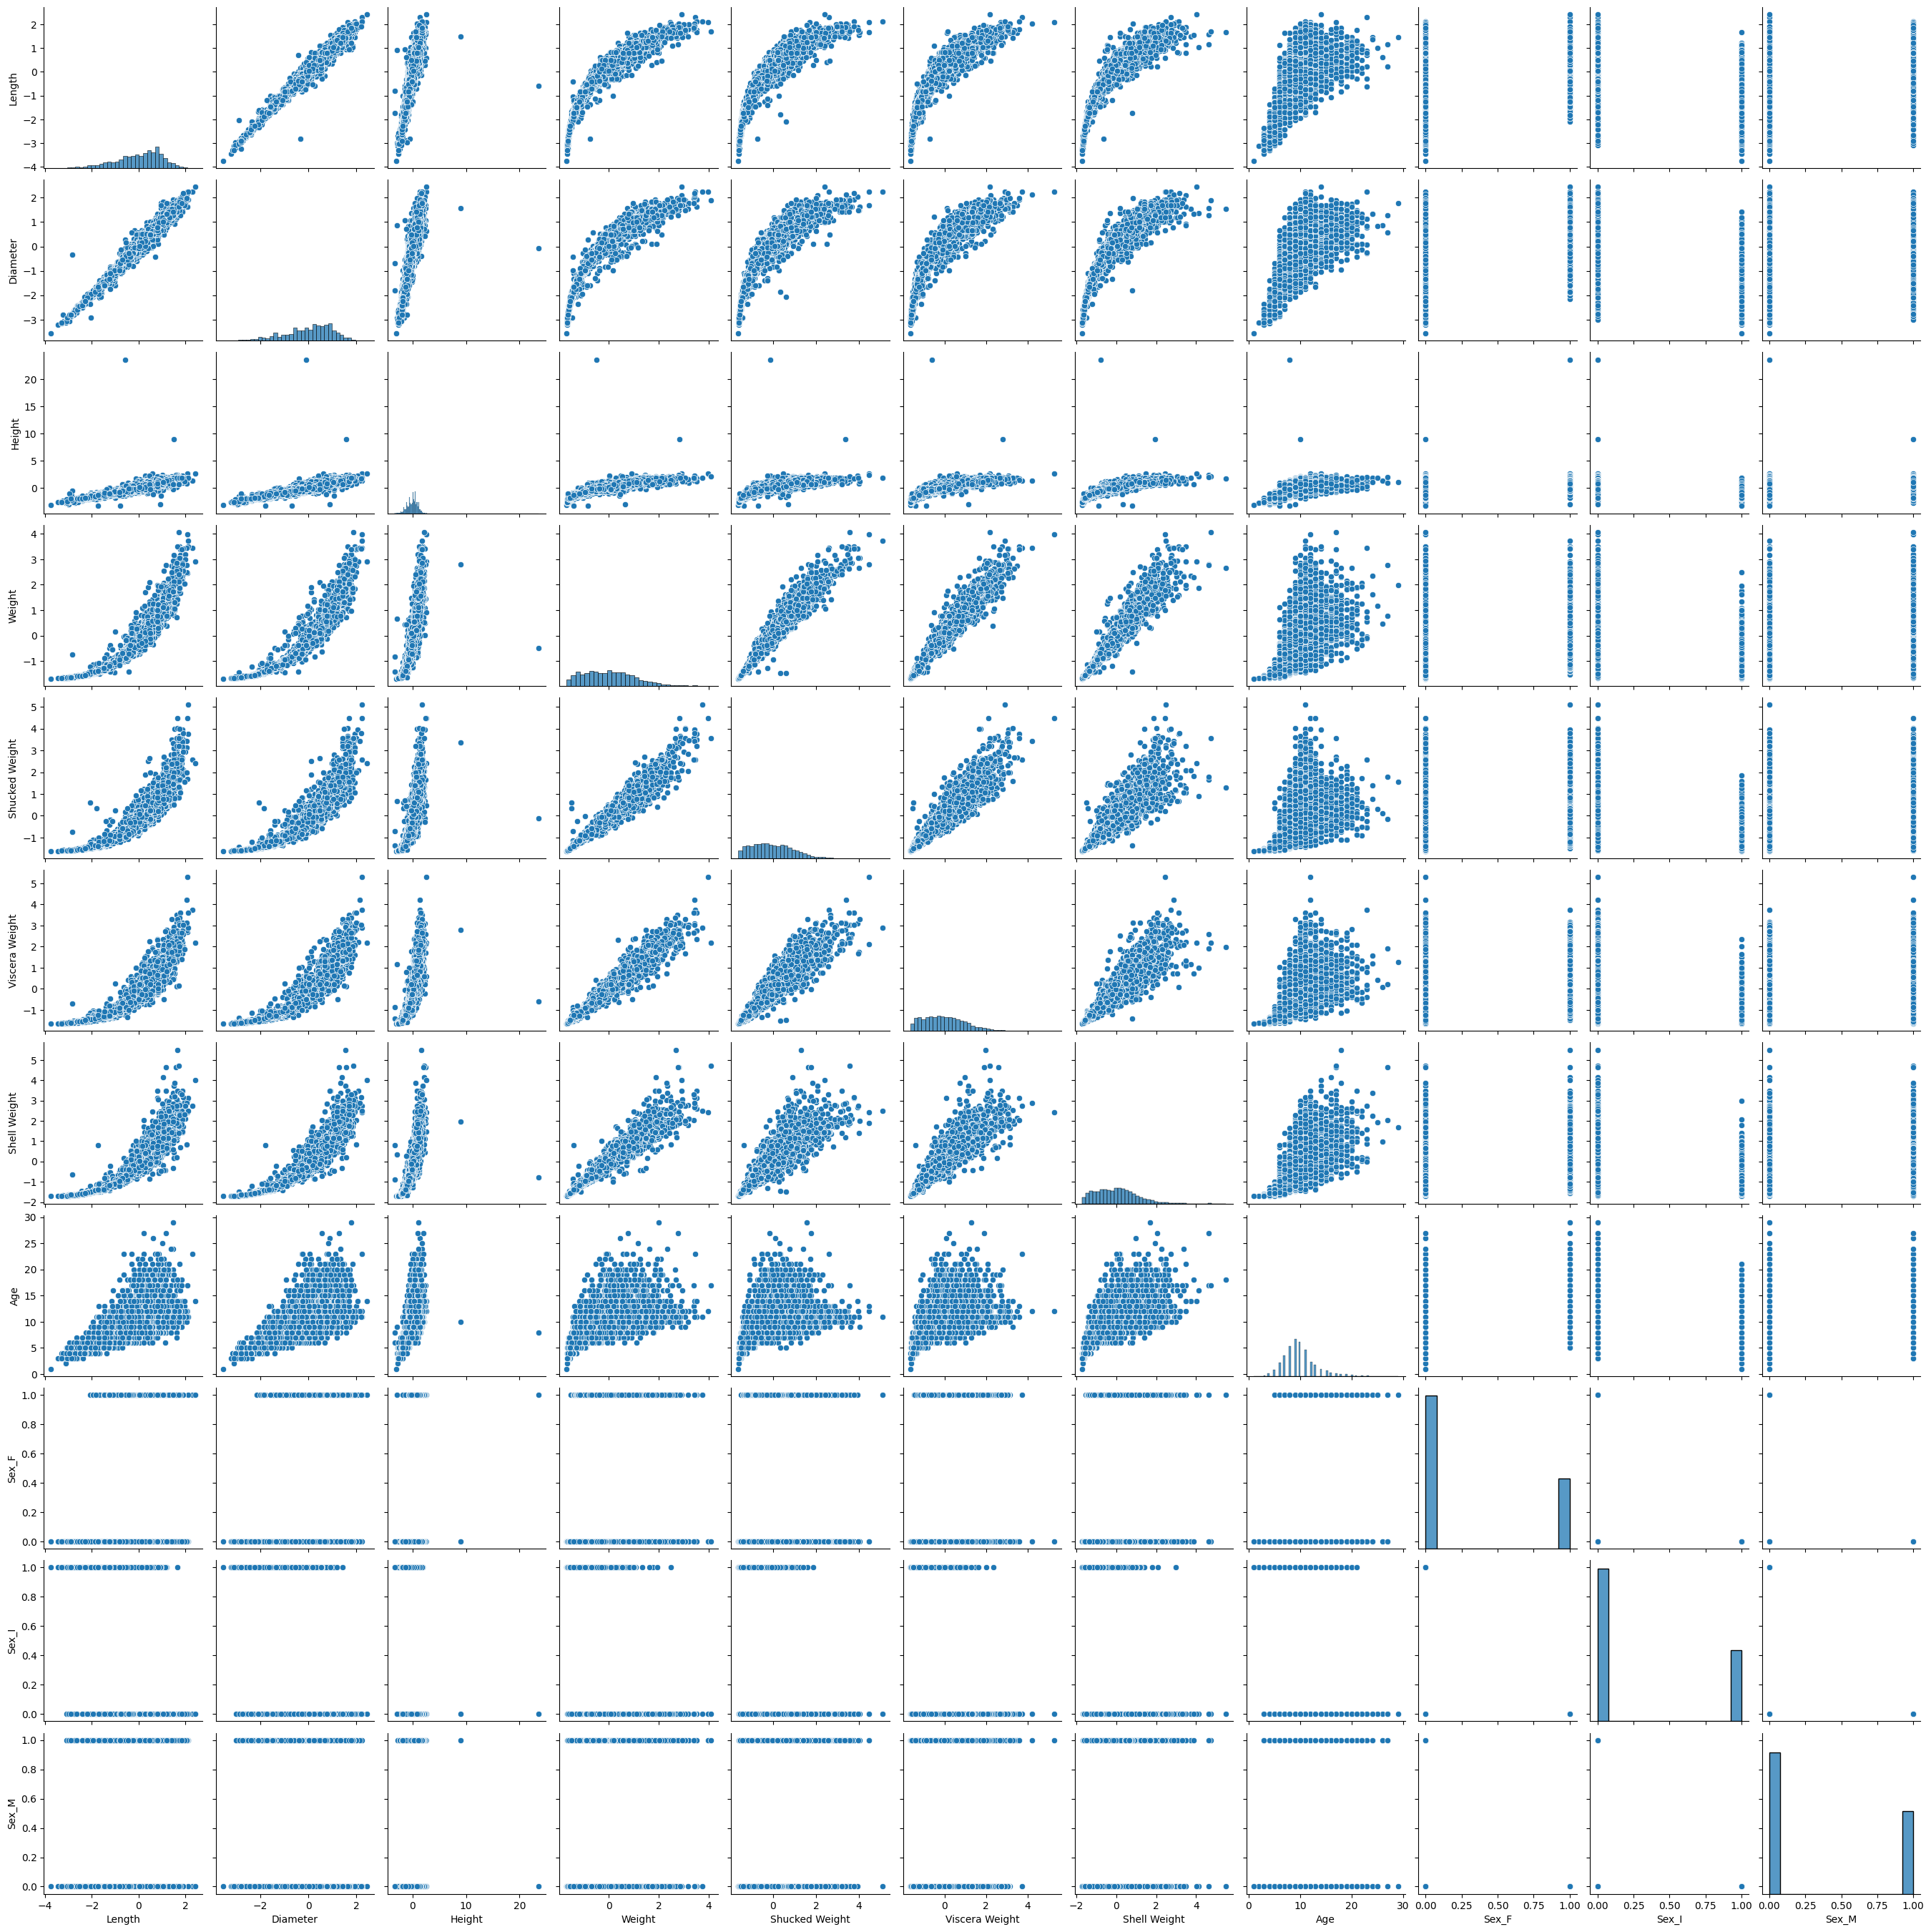

In [132]:
# import seaborn as sns
# plt.figure(figsize=(8, 6))
# correlation_matrix = crab_onehot.corr()
# # correlation_matrix = crab.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title('Correlation Matrix')
# plt.savefig('heatmap.png') # Add this line to save the plot
# plt.show()

# sns.pairplot(crab_onehot)
# # sns.pairplot(crab)
# plt.savefig('pairplot.png') # Add this line to save the plot
# plt.show()

In [142]:
print(f"Test accuracy {rmsbest:.3f} achieved with k={k} neighbors")

Test accuracy 2.452 achieved with k=19 neighbors


In [ ]:
# x_train,x_test,y_train,y_test = train_test_split(ip,op,test_size=0.35,random_state=1234)
from sklearn.ensemble import IsolationForest
outlier_model = IsolationForest(contamination=0.01)  # contamination 参数控制被认为是离群值的比例

# 使用 fit_predict 方法进行离群值检测
outliers = outlier_model.fit_predict(ip)  # 假设 features 是你的特征数据
print(outliers)
ip['outlier'] = outlier_model.fit_predict(ip)

# 标记离群值的样本（-1 表示离群值）
outliers = ip[ip['outlier'] == -1]
outlier_indices = np.where(outliers == -1)
# # 打印离群值的样本
# print("Outliers:")
# print(outliers)

# # 删除离群值列
# ip = ip.drop(columns=['outlier'])
# op = op.drop(columns=['outlier'])

# # 找出被标记为离群值的样本的索引
# outlier_indices = np.where(outliers == -1)
# # print(outlier_indices.size)
# # 剔除离群值
ip = np.delete(ip, outlier_indices, axis=0)
op = np.delete(op, outlier_indices, axis=0)



In [159]:
x_train,x_test,y_train,y_test = train_test_split(ip,op,test_size=0.35,random_state=1234)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, oob_score=True, random_state=1234)
rf.fit(x_train,y_train)
yp = rf.predict(x_test)
acc = metrics.accuracy_score(y_test,yp)           # classifier accuracy
rmserr = rmse(yp,y_test.values)  # rms error
# score = rf.score(x_train,y_train)
print("err：", rmserr)

ValueError: ignored

# Discuss drawbacks with the analysis above. Also suggest alternative solution